In [22]:
import pandas as pd
from matplotlib import pyplot as plt
from textwrap import wrap
import numpy as np

In [23]:
trump_dataset = pd.read_csv('hashtag_donaldtrump.csv', encoding='latin_1', lineterminator='\n')
biden_dataset = pd.read_csv('hashtag_joebiden.csv', encoding='latin_1', lineterminator='\n')

trump_dataset.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,ð Noticias de interÃ©s para latinos de la c...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump âs ...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - Ø±ÙØ§ Ø£Ø¨ØªØ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [24]:
trump_dataset['reference'] = 'trump'
biden_dataset['reference'] = 'biden'

dataset = pd.concat([trump_dataset, biden_dataset])

dataset = dataset.drop(columns = ['collected_at', 'tweet_id', 'source', 'user_name', 'user_screen_name', 'user_description', 'user_join_date'])

dataset.sort_values(by='created_at')

dataset.head(20)

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,reference
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,3.606665e+08,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,trump
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,3.316176e+08,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,8.436472e+06,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,trump
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,8.283556e+17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump âs ...,4.0,3.0,4.741380e+07,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,trump
5,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,1.138416e+09,2363.0,"Perris,California",33.782519,-117.228648,NaN,United States of America,North America,California,CA,trump
6,2020-10-15 00:00:17,@richardmarx Glad u got out of the house! DICK...,0.0,0.0,7.674018e+17,75.0,"Powell, TN",NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump
7,2020-10-15 00:00:18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,9.007611e+17,766.0,"Ohio, USA",40.225357,-82.688140,NaN,United States of America,North America,Ohio,OH,trump
8,2020-10-15 00:00:20,One of the single most effective remedies to e...,0.0,0.0,5.404769e+08,151.0,"Pennsylvania, USA",40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,trump
9,2020-10-15 00:00:21,#Election2020 #Trump \n#FreedomOfSpeech https:...,0.0,0.0,1.305533e+18,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump


# 3) Sentiment analysis on tweets

In [28]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import nltk
import re

nltk.download('stopwords', quiet=True)

font_title = {'family':'serif','color':'blue','size':20}

# Function to Create Wordcloud
def create_wordcloud(text, title):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                   max_words=1000,
                   stopwords=stopwords,
                   random_state=42,
                   width=700, height=300, repeat=True)
    wc.generate(str(text))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontdict=font_title)
    plt.show()

In [29]:
def clean_tweets(tweets):
    new_tweets = []
    for tweet in tweets:
        tweet = re.sub("(@[A-Za-z0-9_]+)|(#[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet)
        new_tweets.append(tweet)
    return new_tweets

trump_dataset = dataset[dataset['reference'] == 'trump']
biden_dataset = dataset[dataset['reference'] == 'biden']
trump_tweets = clean_tweets(trump_dataset['tweet'])
biden_tweets = clean_tweets(biden_dataset['tweet'])

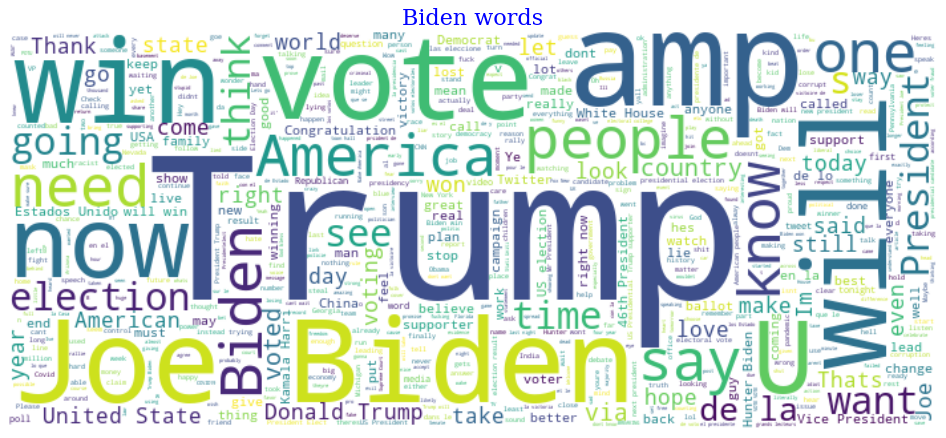

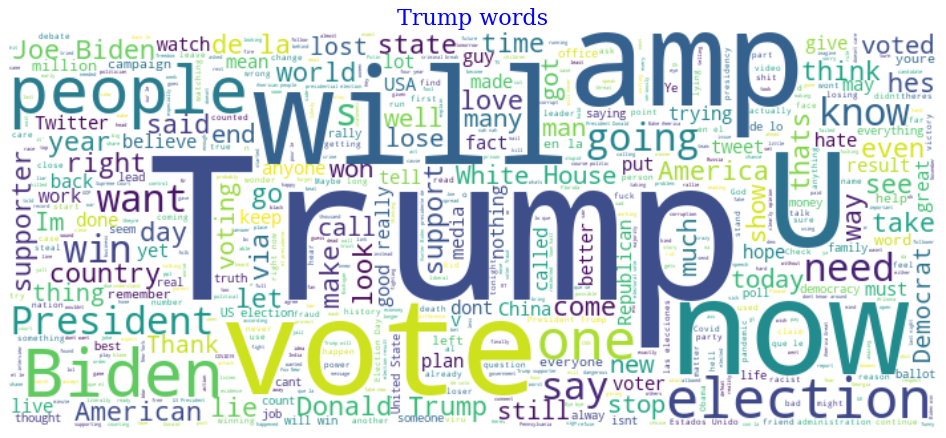

In [30]:
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(biden_tweets, "Biden words")
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(trump_tweets, "Trump words")